# House Price Prediction Project

## Project Goal

## Load Modules / libraries

In [1]:
# load libraries
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataSet

In [2]:
df = pd.read_excel('Uttar_Pradesh_Dataset.xlsx')


In [3]:
pd.set_option("display.max_columns",None)

## Get a brief information about dataset

In [4]:
df.head()

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville


In [5]:
df.shape

(102100, 11)

In [6]:
df.isnull().sum()

Unnamed: 0        0
Type_of_plot      0
City              0
Total Price       0
Unit              0
Rupee_per_area    0
Open_Date         0
Description       0
Area              0
Apartement        0
Project Name      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102100 entries, 0 to 102099
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      102100 non-null  int64 
 1   Type_of_plot    102100 non-null  object
 2   City            102100 non-null  object
 3   Total Price     102100 non-null  object
 4   Unit            102100 non-null  object
 5   Rupee_per_area  102100 non-null  object
 6   Open_Date       102100 non-null  object
 7   Description     102100 non-null  object
 8   Area            102100 non-null  int64 
 9   Apartement      102100 non-null  object
 10  Project Name    102100 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.6+ MB


In [8]:
df['Type_of_plot']=df['Type_of_plot'].astype('category')
df['Type_of_plot'].value_counts()

Type_of_plot
2 BHK Apartment            35735
3 BHK Apartment            35735
1 BHK Apartment             5105
1 BHK Villa                 5105
2 BHK Independent House     5105
2 BHK Villa                 5105
4 BHK Apartment             5105
Residential Plot            5105
Name: count, dtype: int64

In [9]:
df['Apartement']=df['Apartement'].astype('category')
df['Apartement'].value_counts()

Apartement
2 BHK Apartment            35735
3 BHK Apartment            35735
1 BHK Apartment             5105
1 BHK Villa                 5105
2 BHK Independent House     5105
2 BHK Villa                 5105
4 BHK Apartment             5105
Residential Plot            5105
Name: count, dtype: int64

## Checking data consistency between `Apartment` and `Type_of_Plot`, is these both are same

In [10]:
res=df['Apartement']!=df['Type_of_plot']
res.sum()

0

## Converting `Rupee_per_area` colm value to float from object type

In [11]:
def modifyPricePerUnitArea(price_str):
#     5,000 / sq ft
    price_str=price_str.strip()
    
    price=""
    for i in price_str:
        if i!="," and not i.isdigit():
            break
        if i!=",":
            price+=i
    return float(price)

In [12]:
df['new_price_per_sq_ft']=df['Rupee_per_area'].apply(modifyPricePerUnitArea)

In [13]:
df.head()

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name,new_price_per_sq_ft
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers,5000.0
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio,8300.0
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2,4660.0
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes,3850.0
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville,4716.0


## Checking data consistency that the unit of `Total Price` and the unit value in `unit` colm is same in evry row or not 

In [14]:
units=df['Unit'].astype('category')
units.value_counts()

Unit
 L     91890
 Cr    10210
Name: count, dtype: int64

In [15]:
def extract_unit(price_str):
    return price_str[-2:].strip()

In [16]:
new_unit=df['Total Price'].apply(extract_unit)
new_unit.head()

0     L
1    Cr
2     L
3     L
4     L
Name: Total Price, dtype: object

In [17]:
df.head(5)

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name,new_price_per_sq_ft
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers,5000.0
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio,8300.0
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2,4660.0
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes,3850.0
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville,4716.0


In [18]:
df['Unit'][0]

' L'

In [19]:
df['Unit']=df['Unit'].str.strip()

In [20]:
res=new_unit!=df['Unit']
res.sum()

0

## Converting `Total Price` colm value to float from object type and saving it into new colm

In [21]:
unit={'L':10**5, 'Cr':10**7}
def modifyTotalPrice(price_str):
    try:
        price_str=price_str.strip()
        u=price_str[-2:].strip()
        
        price=""
        for i in price_str:
            if i!="." and not i.isdigit():
                break
            price+=i
        return float(price)*unit[u]
    except:
        return 0

In [22]:
df['new_total_price_1']=df['Total Price'].apply(modifyTotalPrice)

In [23]:
df.head()

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name,new_price_per_sq_ft,new_total_price_1
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers,5000.0,5725000.0
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio,8300.0,20600000.0
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2,4660.0,5312000.0
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes,3850.0,4731000.0
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville,4716.0,7875000.0


In [24]:
res=df["new_total_price_1"]!=df['new_price_per_sq_ft']*df['Area']
res.sum()

61260

In [25]:
2485*8300

20625500

In [26]:
df['new_total_price_2']=df['new_price_per_sq_ft']*df['Area']
df.head()

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name,new_price_per_sq_ft,new_total_price_1,new_total_price_2
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers,5000.0,5725000.0,5725000.0
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio,8300.0,20600000.0,20625500.0
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2,4660.0,5312000.0,5312400.0
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes,3850.0,4731000.0,4731650.0
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville,4716.0,7875000.0,7875720.0


In [27]:
df['City']=df['City'].astype('category')
df['City'].value_counts()

City
Greater Noida    45945
Ghaziabad        25525
Lucknow          25525
Noida             5105
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102100 entries, 0 to 102099
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Unnamed: 0           102100 non-null  int64   
 1   Type_of_plot         102100 non-null  category
 2   City                 102100 non-null  category
 3   Total Price          102100 non-null  object  
 4   Unit                 102100 non-null  object  
 5   Rupee_per_area       102100 non-null  object  
 6   Open_Date            102100 non-null  object  
 7   Description          102100 non-null  object  
 8   Area                 102100 non-null  int64   
 9   Apartement           102100 non-null  category
 10  Project Name         102100 non-null  object  
 11  new_price_per_sq_ft  102100 non-null  float64 
 12  new_total_price_1    102100 non-null  float64 
 13  new_total_price_2    102100 non-null  float64 
dtypes: category(3), float64(3), int64(2), object(6)
memo

In [29]:
df.describe()


,Unnamed: 0,Area,new_price_per_sq_ft,new_total_price_1,new_total_price_2
count,102100.000000,102100.000000,102100.000000,1.021000e+05,1.021000e+05
mean,51049.500000,1407.750000,4697.850000,7.656400e+06,7.661645e+06
std,29473.875579,665.364053,1860.263697,8.145620e+06,8.161917e+06
min,0.000000,377.000000,2400.000000,1.703000e+06,1.703286e+06
25%,25524.750000,1052.500000,3800.000000,3.551750e+06,3.551900e+06
50%,51049.500000,1227.000000,4471.000000,5.250500e+06,5.250950e+06
75%,76574.250000,1636.250000,4862.500000,7.683750e+06,7.684565e+06
max,102099.000000,3525.000000,11000.000000,3.870000e+07,3.877500e+07


## Distribution of apartment prices

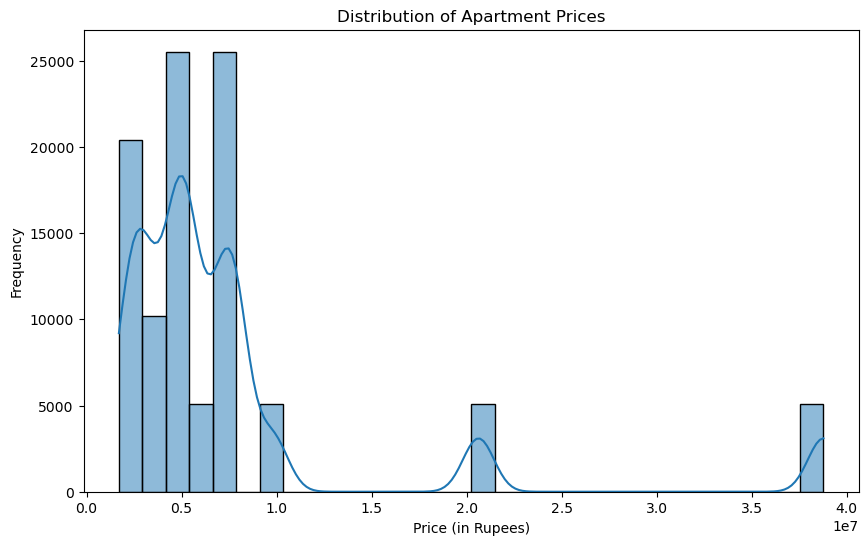

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['new_total_price_2'], bins=30, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

## Number of apartments by city

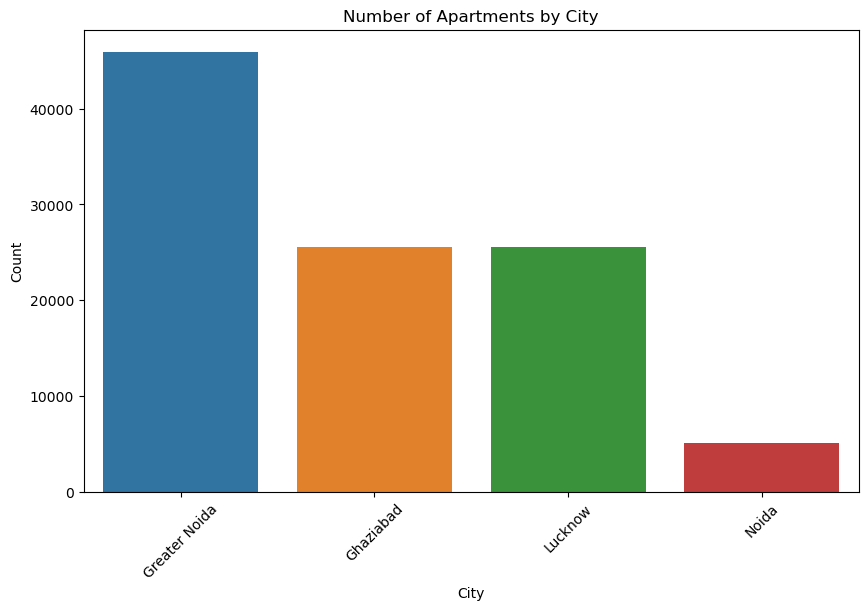

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.title('Number of Apartments by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Average price per square foot by type of plot

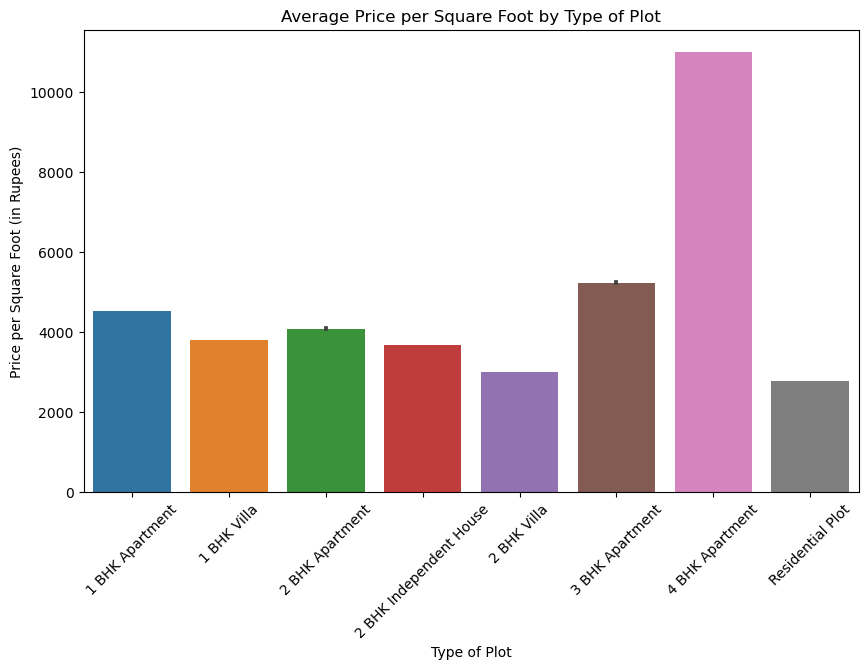

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Type_of_plot', y='new_price_per_sq_ft', estimator='mean')
plt.title('Average Price per Square Foot by Type of Plot')
plt.xlabel('Type of Plot')
plt.ylabel('Price per Square Foot (in Rupees)')
plt.xticks(rotation=45)
plt.show()

## Price Distribution by City

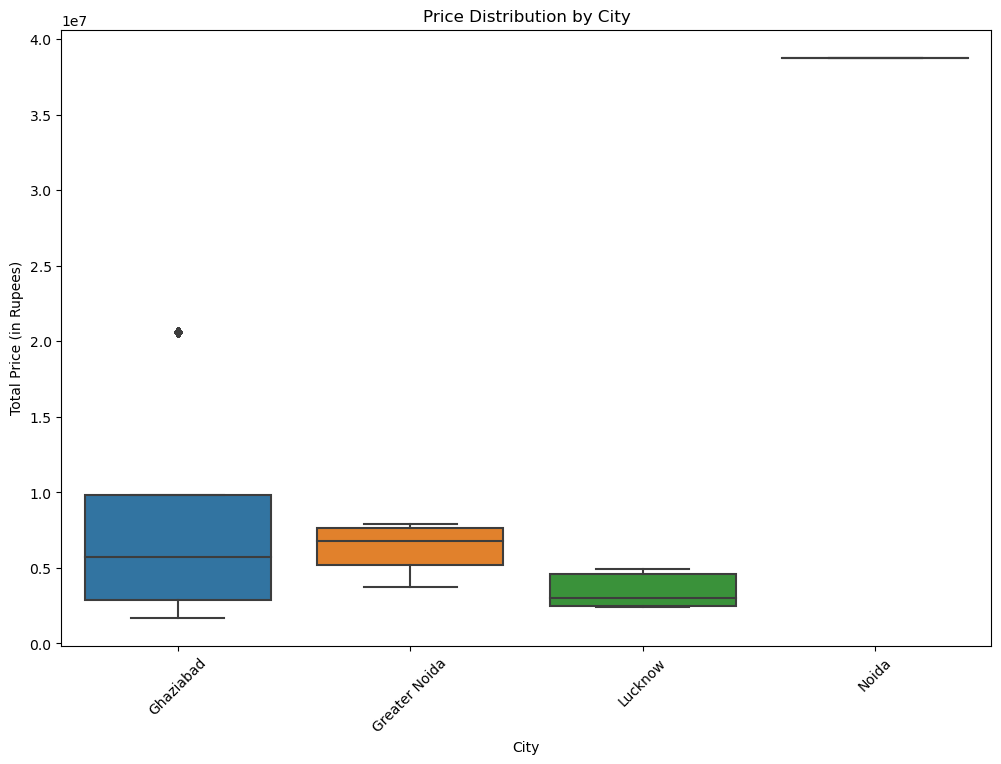

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='City', y='new_total_price_2')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Price (in Rupees)')
plt.xticks(rotation=45)
plt.show()

## Price vs. Area

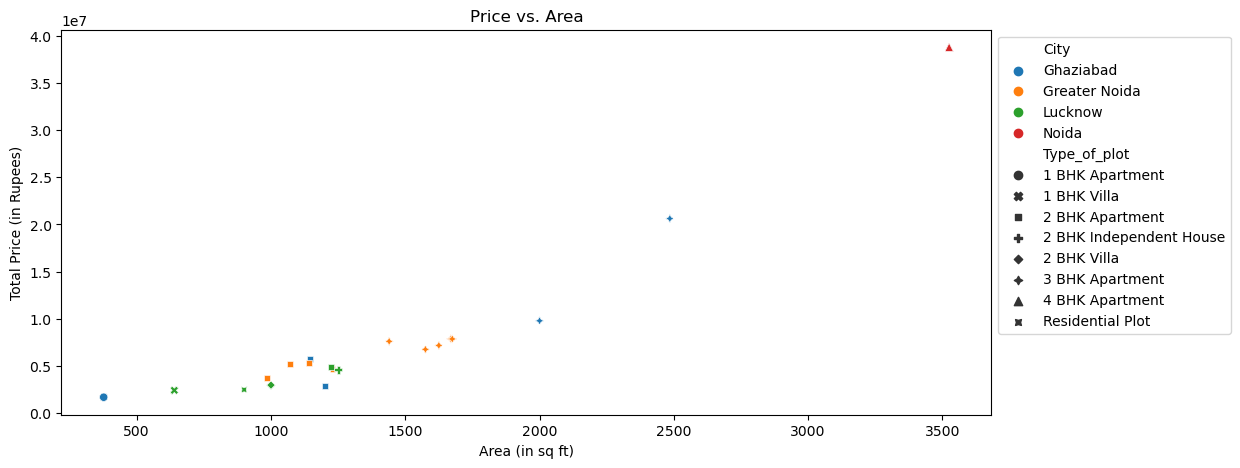

In [34]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Area', y='new_total_price_2', hue='City', style='Type_of_plot')
plt.title('Price vs. Area')
plt.xlabel('Area (in sq ft)')
plt.ylabel('Total Price (in Rupees)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Number of Apartments by Type

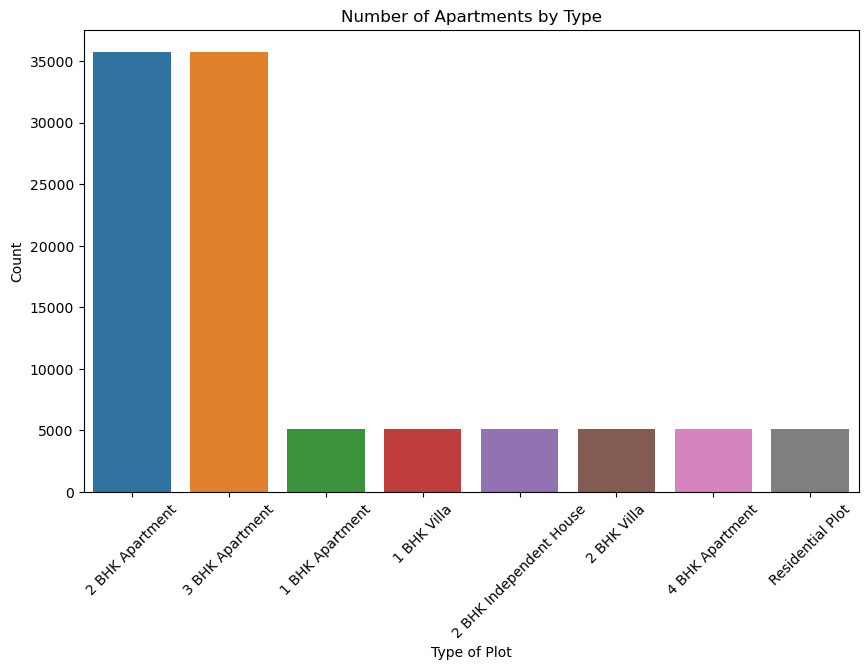

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_of_plot', order=df['Type_of_plot'].value_counts().index)
plt.title('Number of Apartments by Type')
plt.xlabel('Type of Plot')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Average Price by Open Date

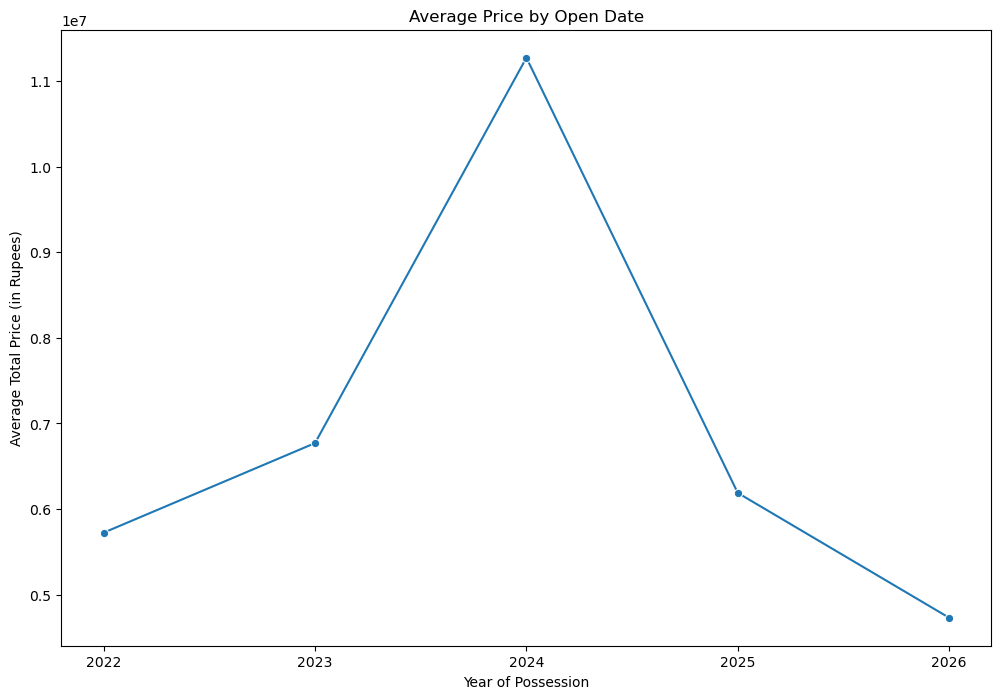

In [36]:
df['Open_Year'] = df['Open_Date'].str.extract(r'(\d{4})').astype(float)
avg_price_by_year = df.groupby('Open_Year')['new_total_price_2'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_price_by_year, x='Open_Year', y='new_total_price_2', marker='o')
plt.title('Average Price by Open Date')
plt.xlabel('Year of Possession')
plt.ylabel('Average Total Price (in Rupees)')
plt.xticks(avg_price_by_year['Open_Year'])
plt.show()

## Training model for predicting the price by taking input: city, area

In [37]:
new_df_1=df[['City', 'new_total_price_2',  'Area']]

In [38]:
new_df_1.head()

,City,new_total_price_2,Area
0,Ghaziabad,5725000.0,1145
1,Ghaziabad,20625500.0,2485
2,Greater Noida,5312400.0,1140
3,Greater Noida,4731650.0,1229
4,Greater Noida,7875720.0,1670


In [39]:
## One Hot Incoding
dummies = pd.get_dummies(new_df_1.City)
dummies

,Ghaziabad,Greater Noida,Lucknow,Noida
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
102095,False,False,True,False
102096,False,True,False,False
102097,False,False,False,True
102098,False,False,True,False


In [40]:
merged_new_df_1 = pd.concat([new_df_1,dummies],axis='columns')
merged_new_df_1

,City,new_total_price_2,Area,Ghaziabad,Greater Noida,Lucknow,Noida
0,Ghaziabad,5725000.0,1145,True,False,False,False
1,Ghaziabad,20625500.0,2485,True,False,False,False
2,Greater Noida,5312400.0,1140,False,True,False,False
3,Greater Noida,4731650.0,1229,False,True,False,False
4,Greater Noida,7875720.0,1670,False,True,False,False
...,...,...,...,...,...,...,...
102095,Lucknow,2990000.0,1000,False,False,True,False
102096,Greater Noida,3739200.0,984,False,True,False,False
102097,Noida,38775000.0,3525,False,False,False,True
102098,Lucknow,2432000.0,640,False,False,True,False


In [41]:
final_new_df_1 = merged_new_df_1.drop(['City'], axis='columns')
final_new_df_1

,new_total_price_2,Area,Ghaziabad,Greater Noida,Lucknow,Noida
0,5725000.0,1145,True,False,False,False
1,20625500.0,2485,True,False,False,False
2,5312400.0,1140,False,True,False,False
3,4731650.0,1229,False,True,False,False
4,7875720.0,1670,False,True,False,False
...,...,...,...,...,...,...
102095,2990000.0,1000,False,False,True,False
102096,3739200.0,984,False,True,False,False
102097,38775000.0,3525,False,False,False,True
102098,2432000.0,640,False,False,True,False


In [42]:
final_new_df_1 = final_new_df_1.drop(['Noida'], axis='columns')
final_new_df_1

,new_total_price_2,Area,Ghaziabad,Greater Noida,Lucknow
0,5725000.0,1145,True,False,False
1,20625500.0,2485,True,False,False
2,5312400.0,1140,False,True,False
3,4731650.0,1229,False,True,False
4,7875720.0,1670,False,True,False
...,...,...,...,...,...
102095,2990000.0,1000,False,False,True
102096,3739200.0,984,False,True,False
102097,38775000.0,3525,False,False,False
102098,2432000.0,640,False,False,True


In [43]:
x=final_new_df_1.drop(['new_total_price_2'], axis='columns')
x

,Area,Ghaziabad,Greater Noida,Lucknow
0,1145,True,False,False
1,2485,True,False,False
2,1140,False,True,False
3,1229,False,True,False
4,1670,False,True,False
...,...,...,...,...
102095,1000,False,False,True
102096,984,False,True,False
102097,3525,False,False,False
102098,640,False,False,True


In [44]:
y=final_new_df_1['new_total_price_2']
y

0          5725000.0
1         20625500.0
2          5312400.0
3          4731650.0
4          7875720.0
             ...    
102095     2990000.0
102096     3739200.0
102097    38775000.0
102098     2432000.0
102099     4900000.0
Name: new_total_price_2, Length: 102100, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(x,y)

LinearRegression()

In [47]:
pred_y=model.predict(x) 

In [48]:
pred_y

array([ 5884565.41242193, 16111748.25774778,  4434310.39371812, ...,
       38775000.00000099,   713761.96055701,  5178614.1728821 ])

In [49]:
model.score(x,y)

0.9610298260119098

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred=model.predict(X_test)
y_pred

array([6726107.77849567, 6291298.79279891, 2697913.36551045, ...,
       7755550.30949633, 6291298.79279891, 4438457.70960533])

In [53]:
y_test

13474    7621920.0
12388    2880000.0
87985    2499300.0
72268    2880000.0
14024    7875720.0
           ...    
9065     2499300.0
51708    2880000.0
42733    6770925.0
23328    2880000.0
45222    5312400.0
Name: new_total_price_2, Length: 30630, dtype: float64

In [54]:
model.score(X_test, y_test)

0.9602302548760712

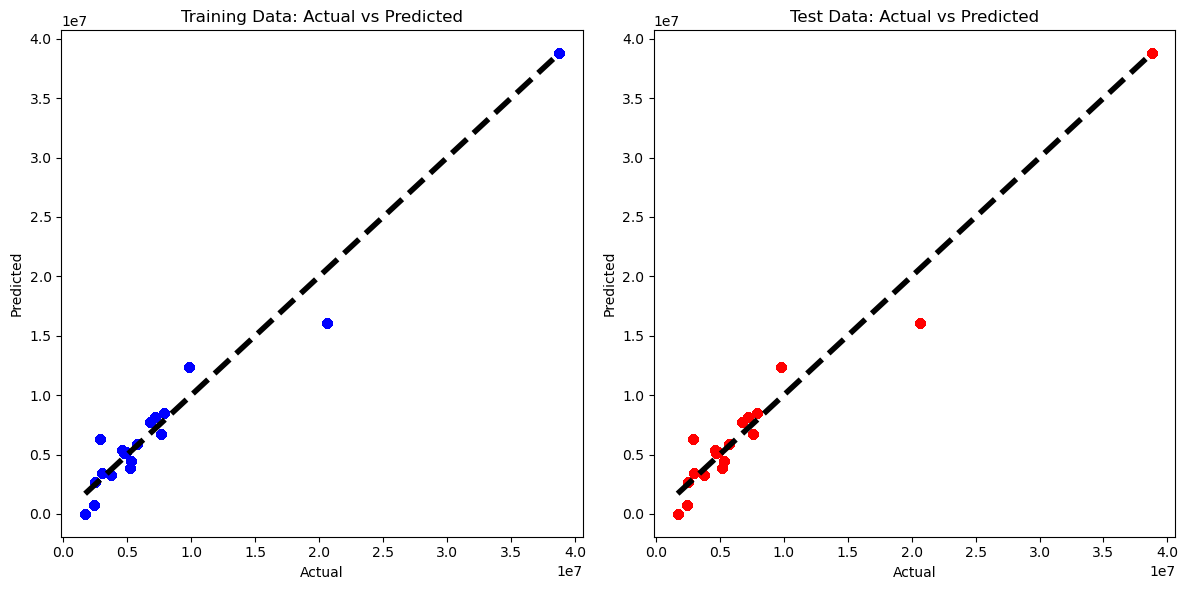

In [55]:
import matplotlib.pyplot as plt

# Plotting training data
plt.figure(figsize=(12, 6))

# Training data predictions
plt.subplot(1, 2, 1)
plt.scatter(y, pred_y, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')

# Test data predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')

plt.tight_layout()
plt.show()


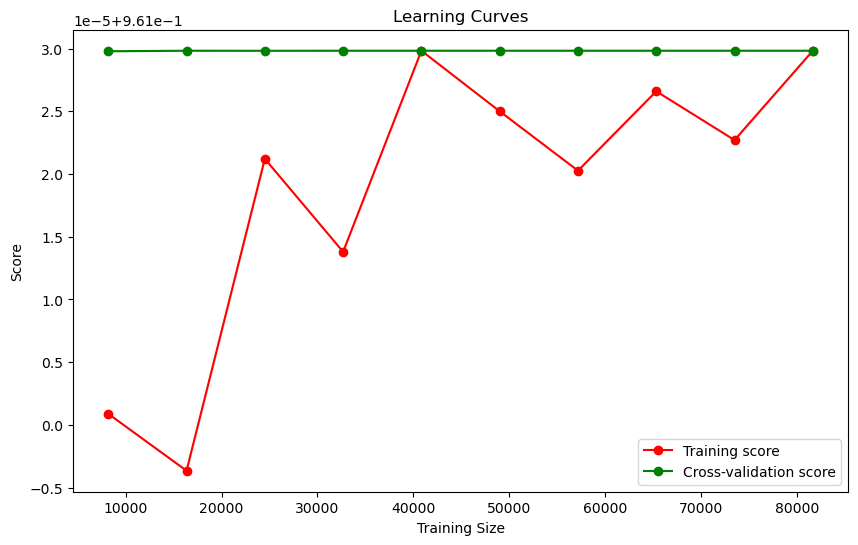

In [56]:
from sklearn.model_selection import cross_val_score, learning_curve
import seaborn as sns

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.show()



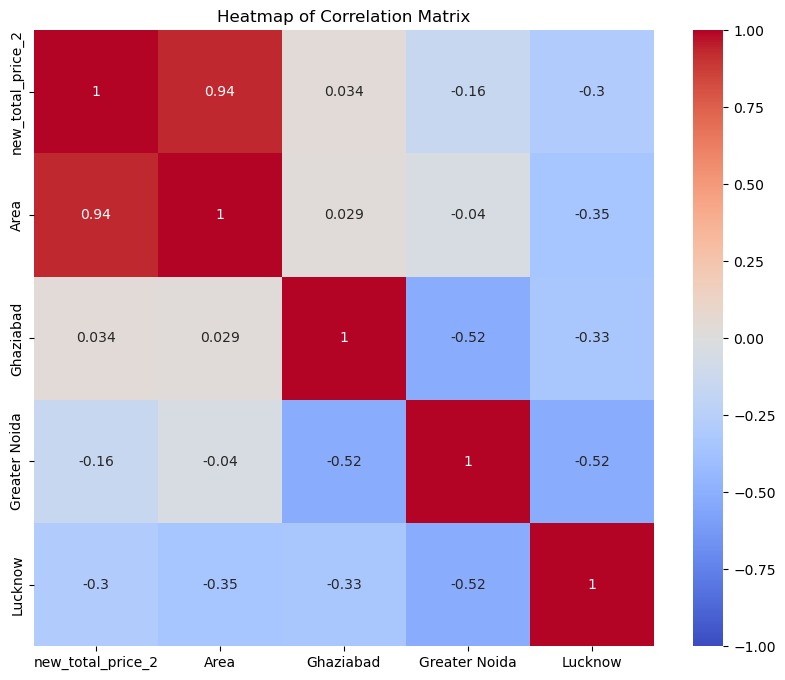

In [57]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = final_new_df_1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

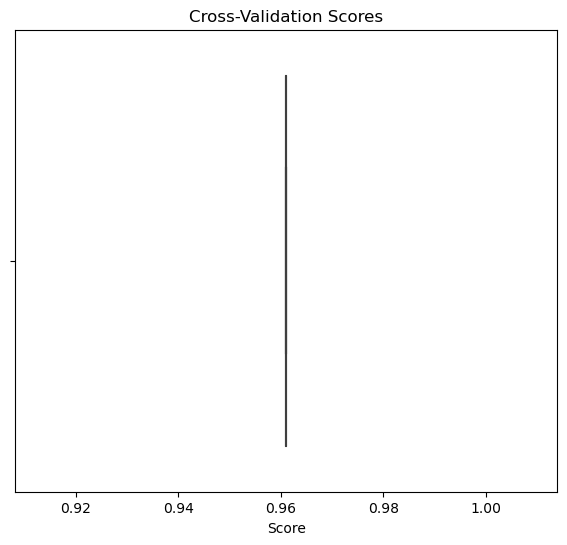

In [58]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected Cross-Validation Scores Plot
cv_scores = cross_val_score(model, x, y, cv=5)

plt.figure(figsize=(7, 6))
sns.boxplot(x=cv_scores, orient="h")
plt.xlabel('Score')
plt.title('Cross-Validation Scores')
plt.show()


In [59]:
new_df_2=df[['City', 'Apartement', 'new_total_price_2',  'Area']]

In [60]:
new_df_2

,City,Apartement,new_total_price_2,Area
0,Ghaziabad,2 BHK Apartment,5725000.0,1145
1,Ghaziabad,3 BHK Apartment,20625500.0,2485
2,Greater Noida,2 BHK Apartment,5312400.0,1140
3,Greater Noida,2 BHK Apartment,4731650.0,1229
4,Greater Noida,3 BHK Apartment,7875720.0,1670
...,...,...,...,...
102095,Lucknow,2 BHK Villa,2990000.0,1000
102096,Greater Noida,2 BHK Apartment,3739200.0,984
102097,Noida,4 BHK Apartment,38775000.0,3525
102098,Lucknow,1 BHK Villa,2432000.0,640


In [61]:
print(df.shape)

(102100, 15)


In [62]:
df.tail(5)

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name,new_price_per_sq_ft,new_total_price_1,new_total_price_2,Open_Year
102095,102095,2 BHK Villa,Lucknow,29.9 L,L,"2,990 / sq ft",3 - 4 years old,2 BHK in Mohanlalganj Lucknow:This spacious 2...,1000,2 BHK Villa,Kalpana Residency,2990.0,2990000.0,2990000.0,NaN
102096,102096,2 BHK Apartment,Greater Noida,37.39 L,L,"3,800 / sq ft",3 - 4 years old,2 BHK in CHI 5 Greater Noida:Itâs a 2 bhk m...,984,2 BHK Apartment,Nimbus Express Park View 2,3800.0,3739000.0,3739200.0,NaN
102097,102097,4 BHK Apartment,Noida,3.87 Cr,Cr,"11,000 / sq ft",2 - 3 years old,4 BHK in Sector 78 Noida:Well designed 4 bhk ...,3525,4 BHK Apartment,Mahagun Mezzaria,11000.0,38700000.0,38775000.0,NaN
102098,102098,1 BHK Villa,Lucknow,24.32 L,L,"3,800 / sq ft",0 - 1 year old,1 BHK in Jankipuram Extension Lucknow:Itâs ...,640,1 BHK Villa,Vasundhara R S Homes,3800.0,2432000.0,2432000.0,NaN
102099,102099,2 BHK Apartment,Lucknow,49 L,L,"4,000 / sq ft",0 - 1 year old,2 BHK in Mubarakpur Lucknow:It has a built-up...,1225,2 BHK Apartment,Ratan Sai Ratan Prestige,4000.0,4900000.0,4900000.0,NaN


In [63]:
df.describe()

,Unnamed: 0,Area,new_price_per_sq_ft,new_total_price_1,new_total_price_2,Open_Year
count,102100.000000,102100.000000,102100.000000,1.021000e+05,1.021000e+05,40840.000000
mean,51049.500000,1407.750000,4697.850000,7.656400e+06,7.661645e+06,2024.125000
std,29473.875579,665.364053,1860.263697,8.145620e+06,8.161917e+06,1.165937
min,0.000000,377.000000,2400.000000,1.703000e+06,1.703286e+06,2022.000000
25%,25524.750000,1052.500000,3800.000000,3.551750e+06,3.551900e+06,2023.750000
50%,51049.500000,1227.000000,4471.000000,5.250500e+06,5.250950e+06,2024.000000
75%,76574.250000,1636.250000,4862.500000,7.683750e+06,7.684565e+06,2025.000000
max,102099.000000,3525.000000,11000.000000,3.870000e+07,3.877500e+07,2026.000000


In [64]:
df.describe().shape

(8, 6)

## training model for predicting the price by taking input: city, type_of_plot, area

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'Uttar_Pradesh_Dataset.xlsx'
data = pd.read_excel(file_path)


In [66]:
data.head()

,Unnamed: 0,Type_of_plot,City,Total Price,Unit,Rupee_per_area,Open_Date,Description,Area,Apartement,Project Name
0,0,2 BHK Apartment,Ghaziabad,57.25 L,L,"5,000 / sq ft",Possession by Nov 2022,2 BHK in Ahinsa Khand 2 Ghaziabad:It has an a...,1145,2 BHK Apartment,Aegis Trine Towers
1,1,3 BHK Apartment,Ghaziabad,2.06 Cr,Cr,"8,300 / sq ft",Possession by Jul 2024,3 BHK in Kinauni Village Ghaziabad:Itâs a 3...,2485,3 BHK Apartment,Rio Heights Apex D Rio
2,2,2 BHK Apartment,Greater Noida,53.12 L,L,"4,660 / sq ft",Possession by May 2024,2 BHK in Techzone 4 Greater Noida:It has a sa...,1140,2 BHK Apartment,Dev Sai Sports Home Phase 2
3,3,2 BHK Apartment,Greater Noida,47.31 L,L,"3,850 / sq ft",Possession by Feb 2026,2 BHK in Sector 16B Noida Extension Greater N...,1229,2 BHK Apartment,RG Luxury Homes
4,4,3 BHK Apartment,Greater Noida,78.75 L,L,"4,716 / sq ft",Possession by Oct 2024,3 BHK in ETA 2 Greater Noida:It has an area o...,1670,3 BHK Apartment,SKA Metro Ville


In [67]:
# Clean the 'Total Price' column by converting it to numerical values
def convert_price(price):
    if 'L' in price:
        return float(price.replace(' L', '')) * 1e5
    elif 'Cr' in price:
        return float(price.replace(' Cr', '')) * 1e7
    else:
        return np.nan

data['Total Price'] = data['Total Price'].apply(convert_price)

# Drop rows with missing values
data.dropna(subset=['Total Price', 'Type_of_plot', 'City', 'Area'], inplace=True)


In [68]:
# Select relevant features and target variable
X = data[['Type_of_plot', 'City', 'Area']]
y = data['Total Price']

# One-hot encode categorical features
categorical_features = ['Type_of_plot', 'City']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', ['Area'])
    ])

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

y_pred


array([38699999.9778809 ,  2990009.44772276,  4599998.58784826, ...,
        2990009.44772276, 11754756.51756415,  1703000.07579934])

In [69]:
y_test

62697     38700000.0
60755      2990000.0
100170     4600000.0
101903     4731000.0
20299      4900000.0
             ...    
95911      5189000.0
12635      2990000.0
75         2990000.0
12529      9800000.0
88227      1703000.0
Name: Total Price, Length: 20420, dtype: float64

In [70]:
pipeline.score(X_test, y_test)

0.9803551749182866

In [71]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the RMSE
rmse

1142859.7153825422

Predicted Prices:
      Type_of_plot   City  Area  Predicted_Price
0  4 BHK Apartment  Noida  2000     1.699897e+07
1  2 BHK Apartment  Noida  1200     4.362633e+06


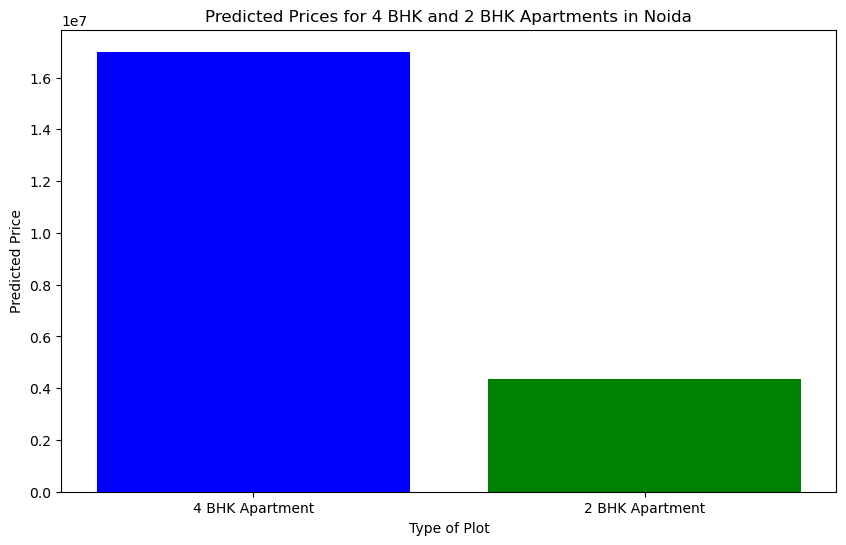

In [72]:
sample_data = pd.DataFrame({
    'Type_of_plot': ['4 BHK Apartment', '2 BHK Apartment'],
    'City': ['Noida', 'Noida'],
    'Area': [2000, 1200]
})

# Predict the prices for the sample dataset
predicted_prices = pipeline.predict(sample_data)
print("Predicted Prices:")
print(sample_data.assign(Predicted_Price=predicted_prices))

# Plot the sample predictions
plt.figure(figsize=(10, 6))
plt.bar(sample_data['Type_of_plot'], predicted_prices, color=['blue', 'green'])
plt.xlabel('Type of Plot')
plt.ylabel('Predicted Price')
plt.title('Predicted Prices for 4 BHK and 2 BHK Apartments in Noida')
plt.show()

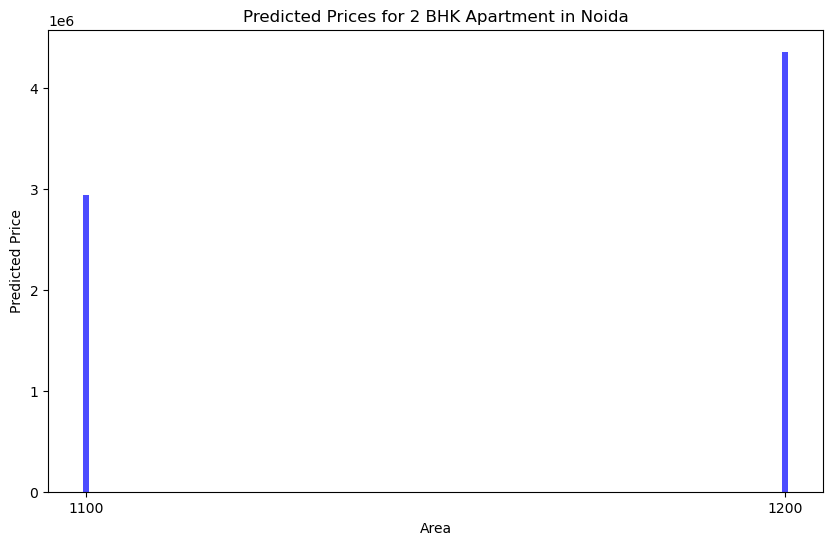

In [73]:
import matplotlib.pyplot as plt

# Example code to compare prices for areas 1100 and 1200
def compare_prices_for_areas(area1, area2, type_of_plot, city, model, preprocessor):
    # Create a DataFrame with the same type_of_plot and city but different areas
    data_example = pd.DataFrame({
        'Type_of_plot': [type_of_plot, type_of_plot],
        'City': [city, city],
        'Area': [area1, area2]
    })

    # Preprocess the data using the preprocessor from the pipeline
    data_example_preprocessed = preprocessor.transform(data_example)

    # Predict the prices using the trained model
    predicted_prices = model.predict(data_example_preprocessed)

    return predicted_prices

# Values for the example
areas = [1100, 1200]
type_of_plot = '2 BHK Apartment'  # Example plot type
city = 'Noida'  # Example city

# Extract preprocessor and model from the pipeline
preprocessor = pipeline.named_steps['preprocessor']
model = pipeline.named_steps['regressor']

# Get the predicted prices
prices = compare_prices_for_areas(areas[0], areas[1], type_of_plot, city, model, preprocessor)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(areas, prices, color='blue', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Predicted Price')
plt.title(f'Predicted Prices for {type_of_plot} in {city}')
plt.xticks(areas)
plt.show()


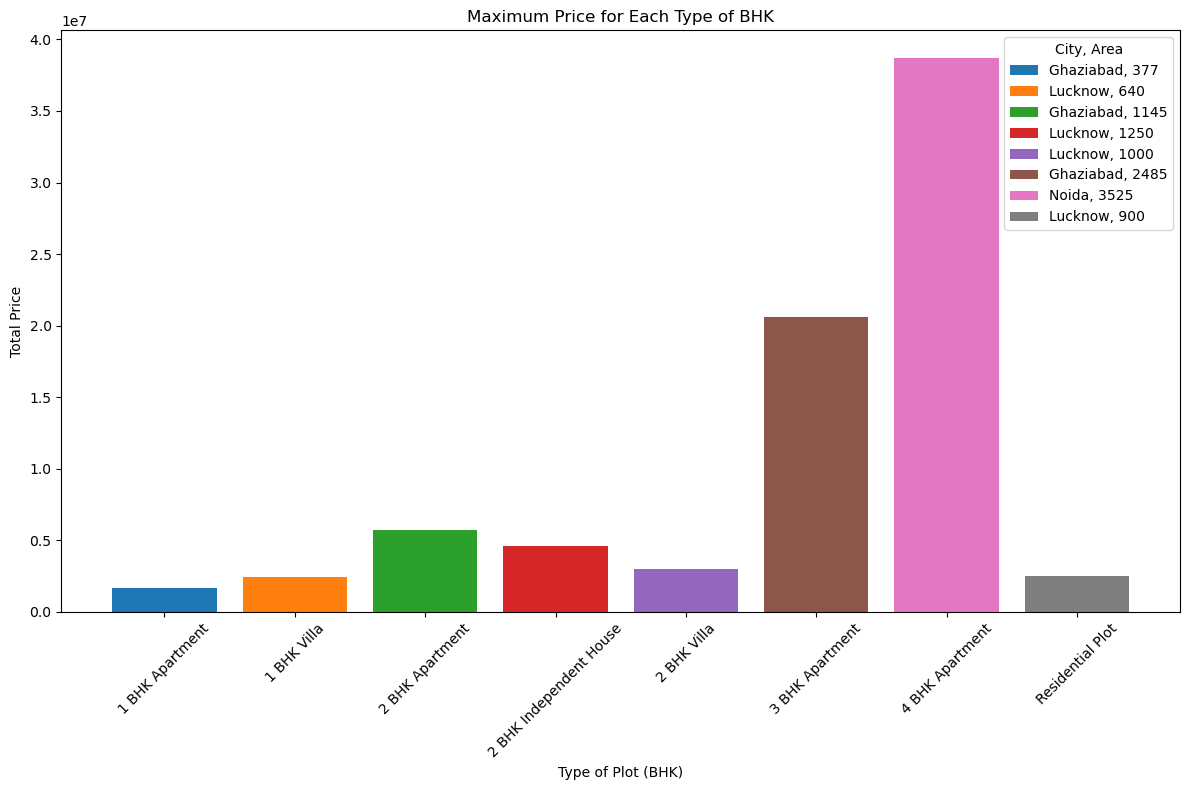

In [74]:
max_price_data = data.groupby(['Type_of_plot', 'City', 'Area'])['Total Price'].max().reset_index()

# Find the maximum price for each BHK type
max_price_per_bhk = max_price_data.loc[max_price_data.groupby('Type_of_plot')['Total Price'].idxmax()]

# Plotting
plt.figure(figsize=(12, 8))
for idx, row in max_price_per_bhk.iterrows():
    plt.bar(row['Type_of_plot'], row['Total Price'], label=f"{row['City']}, {row['Area']}")

plt.xlabel('Type of Plot (BHK)')
plt.ylabel('Total Price')
plt.title('Maximum Price for Each Type of BHK')
plt.legend(title='City, Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

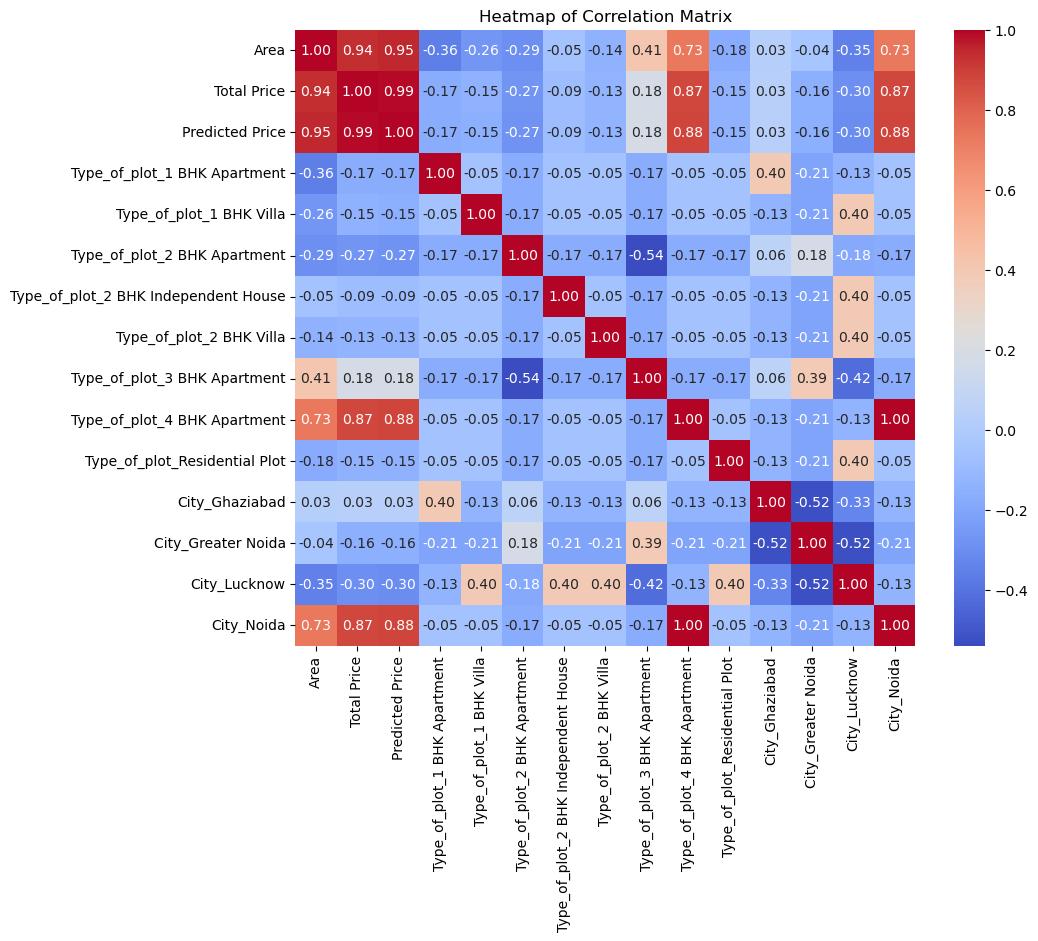

In [75]:


# # Add predictions to the dataframe
data['Predicted Price'] = pipeline.predict(X)

# Encode the categorical variables for correlation matrix
encoded_data = pd.get_dummies(data[['Type_of_plot', 'City', 'Area', 'Total Price', 'Predicted Price']])

# Calculate the correlation matrix
corr_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()
